In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset
dataset = pd.read_csv('data/Data.csv')
dataset.head()

,Country,Age,Insurance,Salary
0,France,44.0,No,72000.0
1,Spain,27.0,Yes,48000.0
2,Germany,30.0,No,54000.0
3,Spain,38.0,No,61000.0
4,Germany,40.0,Yes,NaN


In [28]:
X = dataset.iloc[:, :-1]
y = dataset['Salary']

In [29]:
X.iloc[:,0].isnull().values.any(), X.iloc[:,1].isnull().values.any(), X.iloc[:,2].isnull().values.any()

(False, True, False)

In [30]:
y.isnull().values.any()

True

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Insurance    10 non-null object
Salary       9 non-null float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


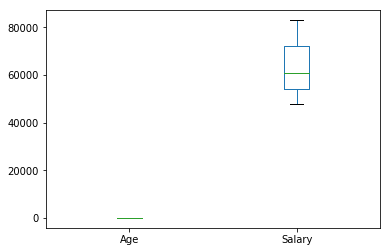

In [32]:
dataset.plot.box()

In [33]:
X.iloc[:,1].median(), y.median()

(38.0, 61000.0)

In [34]:
# Replace null by median
X.iloc[:,1] = X.iloc[:,1].fillna(X.iloc[:,1].median())
y = y.fillna(y.median())
y = y.values

In [35]:
X

,Country,Age,Insurance
0,France,44.0,No
1,Spain,27.0,Yes
2,Germany,30.0,No
3,Spain,38.0,No
4,Germany,40.0,Yes
5,France,35.0,Yes
6,Spain,38.0,No
7,France,48.0,Yes
8,Germany,50.0,No
9,France,37.0,Yes


In [36]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE1 = LabelEncoder()
X.Country = LE1.fit_transform(X.Country)
X

,Country,Age,Insurance
0,0,44.0,No
1,2,27.0,Yes
2,1,30.0,No
3,2,38.0,No
4,1,40.0,Yes
5,0,35.0,Yes
6,2,38.0,No
7,0,48.0,Yes
8,1,50.0,No
9,0,37.0,Yes


In [37]:
LE2 = LabelEncoder()
X.Insurance = LE2.fit_transform(X.Insurance)
X

,Country,Age,Insurance
0,0,44.0,0
1,2,27.0,1
2,1,30.0,0
3,2,38.0,0
4,1,40.0,1
5,0,35.0,1
6,2,38.0,0
7,0,48.0,1
8,1,50.0,0
9,0,37.0,1


In [38]:
X

,Country,Age,Insurance
0,0,44.0,0
1,2,27.0,1
2,1,30.0,0
3,2,38.0,0
4,1,40.0,1
5,0,35.0,1
6,2,38.0,0
7,0,48.0,1
8,1,50.0,0
9,0,37.0,1


In [39]:
LE.classes_

array(['No', 'Yes'], dtype=object)

In [40]:
LE.inverse_transform([0]), LE.inverse_transform([1])

(array(['No'], dtype=object), array(['Yes'], dtype=object))

In [41]:
OHE = OneHotEncoder(categorical_features = [0])
# onehotencoder = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X.values).toarray()
X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1.,  0.,  0., 44.,  0.],
       [ 0.,  0.,  1., 27.,  1.],
       [ 0.,  1.,  0., 30.,  0.],
       [ 0.,  0.,  1., 38.,  0.],
       [ 0.,  1.,  0., 40.,  1.],
       [ 1.,  0.,  0., 35.,  1.],
       [ 0.,  0.,  1., 38.,  0.],
       [ 1.,  0.,  0., 48.,  1.],
       [ 0.,  1.,  0., 50.,  0.],
       [ 1.,  0.,  0., 37.,  1.]])

In [42]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[ 0.,  0., 44.,  0.],
       [ 0.,  1., 27.,  1.],
       [ 1.,  0., 30.,  0.],
       [ 0.,  1., 38.,  0.],
       [ 1.,  0., 40.,  1.],
       [ 0.,  0., 35.,  1.],
       [ 0.,  1., 38.,  0.],
       [ 0.,  0., 48.,  1.],
       [ 1.,  0., 50.,  0.],
       [ 0.,  0., 37.,  1.]])

In [43]:
X.shape, y.shape

((10, 4), (10,))

In [44]:
y = y.reshape(-1, 1)
y.shape

(10, 1)

In [45]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
regressor.intercept_, regressor.coef_

(array([16270.27027027]),
 array([[-1780.01257071, -6808.29666876,  1289.12633564,  -165.93337524]]))

In [47]:
# Predicting the Test set results
y_pred = regressor.predict(X[:5, :])
y_pred

array([[72991.82903834],
       [44102.4512885 ],
       [53164.0477687 ],
       [58448.77435575],
       [65889.37774984]])

In [57]:
ask = ['Germany', 27, 'Yes']
LE1.transform([ask[0]])[0], ask[1], LE2.transform([ask[2]])[0]

(1, 27, 1)

In [66]:
onc=OHE.transform(np.array([[1]])).toarray()[:,1:]

In [89]:
X[:1, :].shape

(1, 4)

In [85]:
test = np.array(onc.tolist()[0]+[27, LE2.transform([ask[2]])[0]])

In [91]:
test.reshape((1,4))

array([[ 1.,  0., 27.,  1.]])

In [92]:
regressor.predict(test.reshape((1,4)))

array([[49130.73538655]])

# Model Validation

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR_Validation = LinearRegression()
LR_Validation.fit(X_train, y_train)
LR_Validation.intercept_, LR_Validation.coef_

In [ ]:
y_pred = LR_Validation.predict(X_test)
y_pred

#  Data Scaling

## Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler()
print(X_sc.feature_range)
# (X_train-X_train.min())/(X_train.max()- X_train.min())

In [ ]:
X_train_sc = X_sc.fit_transform(X_train)
X_test_sc = X_sc.transform(X_test)

In [ ]:
X_sc.data_max_, X_sc.data_min_, X_sc.data_range_, X_sc.feature_range

In [ ]:
X_sc.inverse_transform(X_train_sc) 

In [ ]:
y_sc = MinMaxScaler()
y_train_sc = y_sc.fit_transform(y_train)
y_test_sc = y_sc.transform(y_test)

In [ ]:
dataset.plot.box()

In [ ]:
df = pd.DataFrame(np.hstack([X_train_sc[:,2].reshape(-1,1), y_train_sc]))
df.plot.box()

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR_Validation_MM = LinearRegression()
LR_Validation_MM.fit(X_train_sc, y_train_sc)
LR_Validation_MM.intercept_, LR_Validation_MM.coef_

In [ ]:
y_pred_MM = LR_Validation_MM.predict(X_test_sc)
y_pred_MM

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
X_ss = StandardScaler()
y_ss = StandardScaler()

X_train_ss = X_ss.fit_transform(X_train)
X_test_ss = X_ss.transform(X_test)

y_train_ss = y_ss.fit_transform(y_train)
y_test_ss = y_ss.transform(y_test)


In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR_Validation_SS = LinearRegression()
LR_Validation_SS.fit(X_train_ss, y_train_ss)
LR_Validation_SS.intercept_, LR_Validation_SS.coef_

In [ ]:
y_pred_SS = LR_Validation_SS.predict(X_test_ss)
y_pred_SS

# Model Evaluation

In [ ]:
import sklearn.metrics as eva

## Mean Absolute Error MAE

In [ ]:
eva.mean_absolute_error(y_test, y_pred)

In [ ]:
#

In [ ]:
eva.mean_squared_error(y_test, y_pred)

In [ ]:
eva.r2_score(y_test, y_pred)